# Automatic Number Plate Detection System

In [ ]:

   
'''How to create number plate detection on python'''
import cv2
import numpy as np
import pytesseract
import imutils
#pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR/tesseract.exe"
image = cv2.imread("image/car5.jpg")
image = imutils.resize(image, width = 500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11,17,17)
edge = cv2.Canny(gray, 170,200)
cnts, new = cv2.findContours(edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image1 = image.copy()
cv2.drawContours(image1,cnts,-1,(0,225,0),3)
cnts =sorted(cnts, key=cv2.contourArea, reverse=True)[:30]
NumberPlateCount = None
image2 = image.copy()
cv2.drawContours(image2,cnts,-1,(0,255,0),3)
count = 0
name = 1
for i in cnts:
    perimeter = cv2.arcLength(i, True)
    approx = cv2.approxPolyDP(i,0.02*perimeter,True)
    if(len(approx)==4):
        NumberPlateCount = approx
        x,y,w,h = cv2.boundingRect(i)
        crp_img = image[y:y+h, x:x+w]
        cv2.imwrite(str(name)+ '.png', crp_img)
        name +=1
        break
cv2.drawContours(image,[NumberPlateCount], -1,(0,255,0),3)
crp_img_loc = '1.jpg'
cv2.imshow("Cropped Image", cv2.imread(crp_img_loc))
text = pytesseract.image_to_string(crp_img_loc, lang='eng')
print("Number is : NU 19 PL8 ", text)


cv2.imshow('original image', image)
# cv2.imshow('Gray Image', gray)
# cv2.imshow('Smoother', gray)
# cv2.imshow("canny image", edge)
# cv2.imshow("Canny after contours", image1)
# cv2.imshow("Top 30 contours",image2)
cv2.imshow("Final Image", image)
cv2.waitKey(0)

In [1]:
import cv2
import numpy as np
import pytesseract
import imutils
import tarfile
import matplotlib.pyplot as plt

# Data Preprocessing

In [ ]:
# open file
file = tarfile.open('ANPR_Assignment.tar.gz')

# extracting file
file.extractall('./data')

file.close()

In [ ]:
!ls

In [12]:
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR/tesseract.exe"
image = cv2.imread("./data/VOC2007/JPEGImages/car_100.jpg")

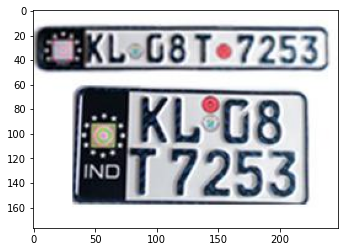

In [13]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

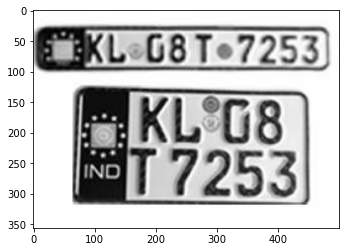

In [14]:
image = imutils.resize(image, width = 500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

Text(0.5, 1.0, 'Gray Image')

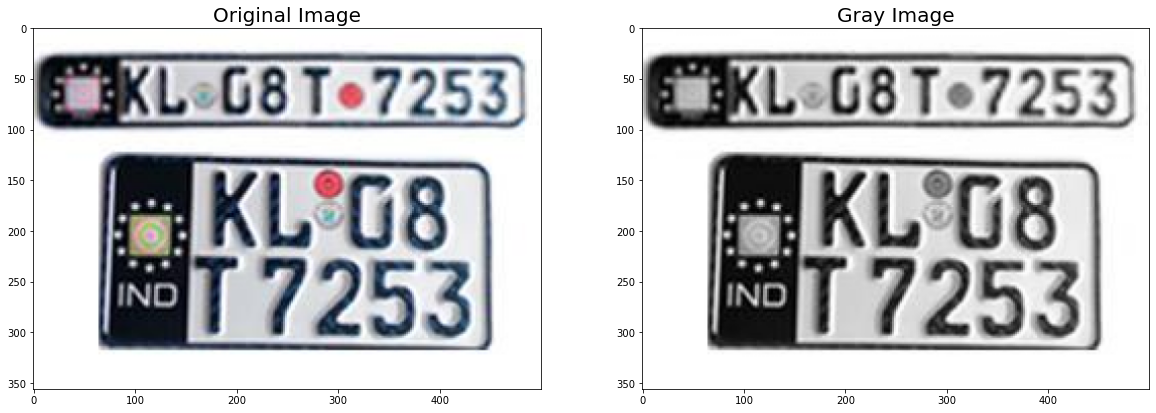

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,13))
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
ax2.set_title('Gray Image', fontsize=20)

Text(0.5, 1.0, 'Smoother Image')

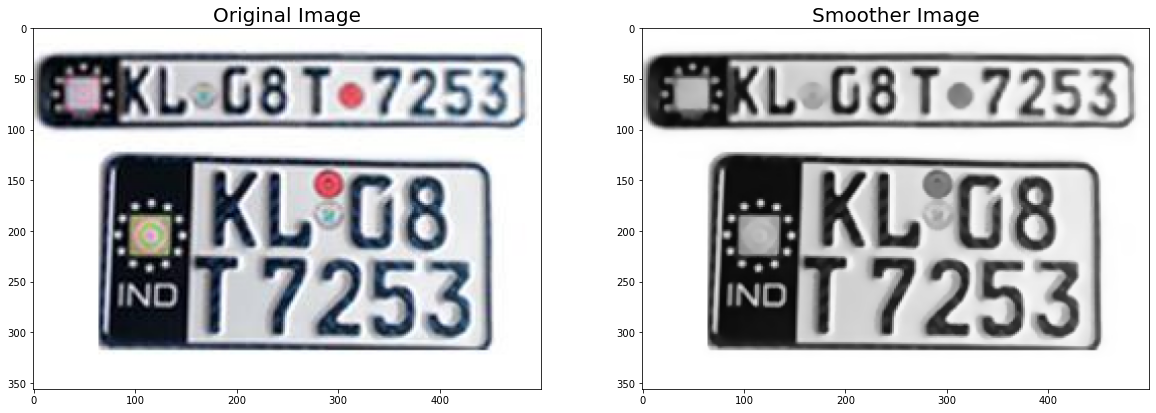

In [16]:
gray = cv2.bilateralFilter(gray, 11,17,17)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,13))
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
ax2.set_title('Smoother Image', fontsize=20)

Text(0.5, 1.0, 'Canny Image')

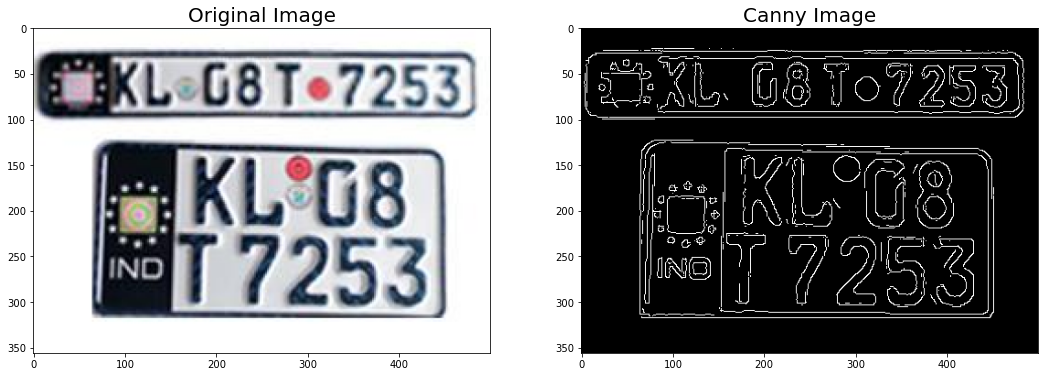

In [17]:
edge = cv2.Canny(gray, 170,220)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,13))
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))
ax2.set_title('Canny Image', fontsize=20)

Text(0.5, 1.0, 'Canny after contours')

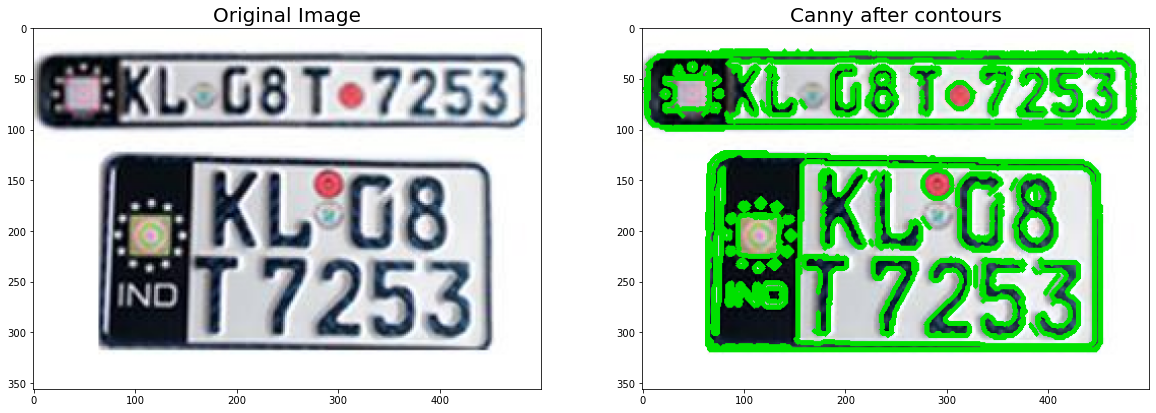

In [18]:
cnts, new = cv2.findContours(edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image1 = image.copy()
cv2.drawContours(image1,cnts,-1,(0,225,0),3)
cnts =sorted(cnts, key=cv2.contourArea, reverse=True)[:30]
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,13))
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
ax2.set_title('Canny after contours', fontsize=20)

Text(0.5, 1.0, 'Top 30 contours')

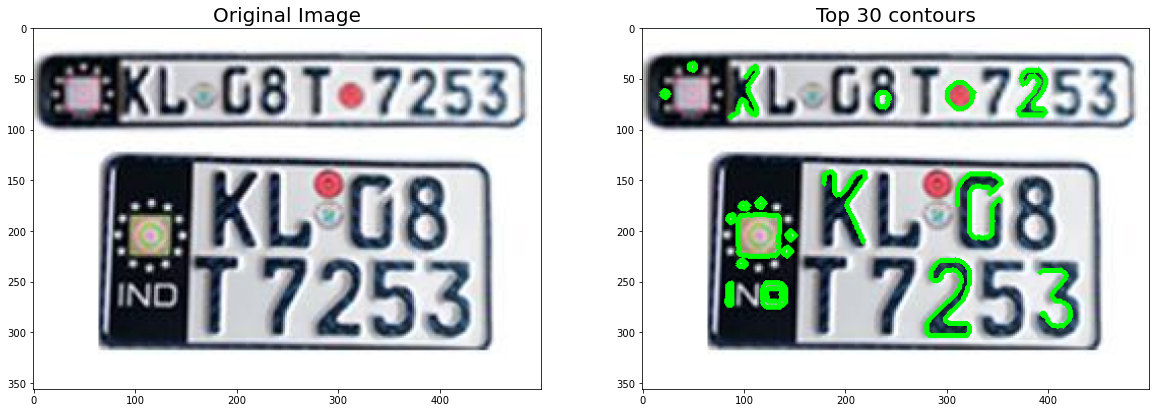

In [19]:
image2 = image.copy()
cv2.drawContours(image2,cnts,-1,(0,255,0),3)
cnts =sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,13))
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
ax2.set_title('Top 30 contours', fontsize=20)

In [21]:

count = 0
name = 1
NumberPlateCount = None
for i in cnts:
    perimeter = cv2.arcLength(i, True)
    approx = cv2.approxPolyDP(i,0.02*perimeter,True)
    if(len(approx)==4):
        NumberPlateCount = approx
        x,y,w,h = cv2.boundingRect(i)
        crp_img = image[y:y+h, x:x+w]
        cv2.imwrite(str(name)+ '.png', crp_img)
        name +=1
        break
cv2.drawContours(image,[NumberPlateCount], -1,(0,255,0),3)
crp_img_loc = '1.png'
cv2.imshow("Cropped Image", cv2.imread(crp_img_loc))
cv2.waitKey(5)


-1